# Churn Prediction and Lifetime Value Analysis

## Table of Contents
<!-- TOC-->

- [Step 1: Business Understanding](#step-1-business-understanding)
  - [Scenario](#scenario)
  - [Objective](#objective)
  - [Hypothesis: ...](#hypothesis-)
  - [Key Business Questions](#key-business-questions)
  - [Approach](#approach)
- [Step 2: Data Understanding](#step-2-data-understanding)
  - [Project Initialisation](#project-initialisation)
  - [Data Collection](#data-collection)
    - [Access the LP2_Telco_churn_first_3000 data set from Microsoft SQL Server](#access-the-LP2_Telco_churn_first_3000-data-from-microsoft-sql-server)
      - [Connect to the database using provided credentials](#connect-to-the-database-using-provided-credentials)
      - [Fetch Information Schema for tables in the database](#fetch-information-schema-for-tables-in-the-database)
      - [Load LP2\_Telco\_churn\_first\_3000 Data](#load-lp2_Telco_churn_3000-data)
    - [Access the LP2_Telco_churn_second_2000 data from GitHub Repository](#access-the-LP2_Telco_churn_second_2000-data-from-github-repository)
    - [Access the Telco-churn-last-2000 data from OneDrive](#access-Telco-churn-last-2000-data-from-onedrive)
  - [Exploratory Data Analysis](#exploratory-data-analysis)
- [Step 3: Data Preparation](#step-3-data-preparation)
  - [Data Cleaning](#data-cleaning)
  - [Data Transformation](#data-transformation)
  - [Data Integration](#data-integration)

<!-- /TOC -->

<!-- ## Worlflow
![A beautiful sunset](https://example.com/sunset.jpg "Sunset at the beach") -->

[Back to Top](#Table-of-Contents)

## Step 1: Business Understanding

##### **Project Background:** In the ever-evolving telecommunication sector, retaining customers and accurately forecasting churn is essential for sustaining growth and profitability. This project seeks to harness advanced classification models to deliver a thorough understanding of customer behaviour for a prominent telecommunication company.

##### **Project Objective:** The project will focus on three core areas:
- Advanced Churn Prediction: We will develop and implement machine learning models to predict which customers are likely to leave the network. 
    This involves identifying critical signals and patterns that precede churn, enabling proactive customer retention strategies.*

- Customer Lifetime Value Calculation: By estimating the lifetime value of each customer, we can provide actionable insights into the long-term revenue each customer brings. 
    This analysis will help prioritize efforts on high-value customers and inform targeted marketing and retention initiatives.

- Analysis of Churn Influencing Factors: Identifying the key factors that drive customers to leave the network is crucial for mitigating churn. 
    The project will examine various customer metrics and behaviours to uncover the primary reasons behind churn, allowing for strategic improvements in customer service and satisfaction.

Through this initiative, the telecommunication company will gain a deeper, data-driven understanding of its customer base, enabling more effective decision-making to enhance customer loyalty and drive sustained business success.
 
##### **Stakeholders:**
-Vodafon

##### **Key metrics and success Criteria:**
- Model should have accuracy scores of 85% (on balance data)
- Good models are expected to have an F1 score of > 80%
- An ROC Curve of 80% is ideal for the model to generalise well
- There should be a minimum of 4 Baseline models
- All hyperparameter tuning should only be applied to the Baseline models if they exceed their F1 score


##### **Features/Columns:**
- customerID
- gender: Whether the customer has a partner or not (Yes, No)
- SeniorCitizen: Whether a customer is a senior citizen or not
- Partner
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure:  Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract: The contract term of the customer (Month-to-Month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod
- MonthlyCharges
- TotalCharges
- Churn

##### **Hypothesis:** 

**A. Null Hypothesis (H0):**
There is no statistical significant relationship between churn rate and the contract term of the customer

**C. Alternate Hypothesis (H1):**
There is a statistical significance relationship between churn rate and the contract term of the customer

##### **Key Business Questions:**
- What is the churn rate for customers with only Phone_service
- Is there a corelation between customers' ternure and churn?
- Does the type of contract affect the probability of churn?
- How does the customer payment_method vary with the churn rate?
-

### Approach

[Back to Top](#Table-of-Contents)

##### **Features/Columns:**
- customerID
## Step 2: Data Understanding

`Data Collection`

<!-- To effectively analyse the Indian start-up ecosystem from 2018 to 2021, comprehensive data collection is crucial. The data will be sourced from multiple datasets that detail startup funding activities within this period. Each dataset will encompass various aspects essential for a holistic understanding of the funding landscape. Specifically, the datasets will include: -->

**A. Feature Details:**

**B. ....:**

`EDA & Data Cleaning`

Inspect the dataset in depth, visualise it to answer analytical questions and plan the cleaning, processing and feature creation.

**A. Data Quality Assessment & Exploring the data (info, duplicates, null values, describe etc.)**
- Identify and remove duplicate records to ensure that each entry is unique and not counted multiple times.
- Remove any data that is not relevant to the analysis. This could include fields that do not contribute to the understanding of customer churns or other extraneous information

**B. Univariate Analysis:**
Explore, analyze and visualize key variables independently of others

**C. Bivariate Analysis:**
Explore, analyze and visualize the relationship variables pairs of different dimensions

**D. Multivariate Analysis:**
Explore, analyze and visualize the relationship among variables

**E. Answer Analytical Questions & deploy their visualisations to Power Bi:**

**F. Test Hypothesis:**

**G. Provide insights:**


### Project Initialisation

In [3]:
# Importing necessary libraries

# Environment variables management
from dotenv import dotenv_values

# Database connection
import pyodbc
import MySQLdb
import mysql.connector
import pymysql

# Data handling
import pandas as pd
import numpy as np

# Data handling and utilities
import re
import calendar
import warnings

# Data fetching
import requests

# Statistical analysis
from scipy.stats import skew, kurtosis

# Visualization
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Data imputation
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Feature Processing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import catboost as cb
import lightgbm as lgb
import xgboost as xgb

# Model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Suppressing all warnings to avoid cluttering the output
warnings.filterwarnings("ignore")

# Set display options for Pandas DataFrame
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Other packages
import os
import pickle



### Data Collection

The task involves accessing three different datasets from different sources: a database, OneDrive, and a GitHub repository. Each dataset has a specific method of access, such as querying a database using ODBC or ORM library, downloading a file programmatically using the requests library from OneDrive, and cloning or downloading a file from a GitHub repository using gitpython or requests library.

#### Access the LP2_Telco_churn_first_3000 from Microsoft SQL Server
Connect to the database using provided credentials

In [4]:
# load environment variables from.env file into dictionary
environment_variables = dotenv_values(".env")

# get the values for the environment variables
server = environment_variables.get("DBS")
login = environment_variables.get("DBU")
password = environment_variables.get("DBP")
database = environment_variables.get("DBN")

# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password}"
#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful:", connection_string)    
except Exception as e:
    print("Connection failed:", e)

Connection successful: DRIVER={SQL Server};SERVER=dap-projects-database.database.windows.net;DATABASE=dapDB;UID=LP2_project;PWD=Stat$AndD@t@Rul3


##### Fetch Information Schema for tables in the database

In [5]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA                  TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  LP2_Telco_churn_first_3000  BASE TABLE


##### Load LP2_Telco_churn_first_3000 Data

In [6]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM LP2_Telco_churn_first_3000        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df_3000 = pd.read_sql(db_query, connection)

# Display DataFrame Info
df_3000.info()
print()

# Display the DataFrame
df_3000.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


#### Access the LP2_Telco-churn-second-2000 data from GitHub Repository

In [7]:
# URL of the file to download
url = "https://github.com/Azubi-Africa/Career_Accelerator_LP2-Classifcation/raw/main/LP2_Telco-churn-second-2000.csv"

# Local file path where the file will be saved
local_file_path = '../data/Telco-churn-second-2000.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(local_file_path), exist_ok=True)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Write the content of the response to the specified file path
    with open(local_file_path, "wb") as f:
        f.write(response.content)
    print("File downloaded successfully")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

# Read the downloaded CSV file into a DataFrame
df_2000 = pd.read_csv(local_file_path)

# Display DataFrame Info
print()
df_2000.info()
print()

# Display the DataFrame
df_2000.head()    

File downloaded successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBil

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
columns = df_3000.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df_2000_test= 'C:/Users/Admin/Documents/Azubi/LP2_customer_churn_project/customer_churn/Data/Telco-churn-last-2000.xlsx'
data_test = pd.read_excel(df_2000_test)

data_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [10]:
#Convert test data to CSV format for compactibility

data_test.to_csv('data_test.csv', index=False)

#### Access Telco-churn-last-2000 data from OneDrive

project_root/
├── notebook.ipynb
└── data/
    └── Telco-churn-last-2000.xlsx

### **Exploratory Data Analysis (EDA)**

- **A. Data Quality Assessment & Data exploration**

In [11]:
columns = df_3000.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df_2000.describe(include='object').T

,count,unique,top,freq
customerID,2043,2043,5600-PDUJF,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


In [13]:
df_2000.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


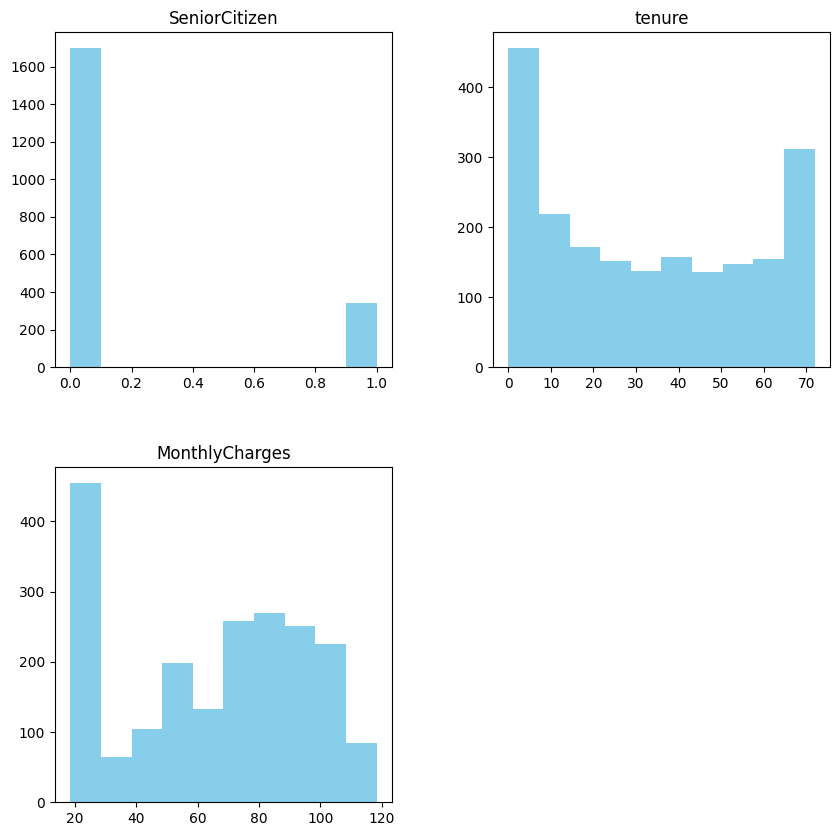

In [14]:
df_2000.hist(figsize=(10,10), grid=False, color='skyblue')

#df_3000.hist(figsize=(10,10), grid=False, color='sky blue')
plt.show()

`Comment`: Explaining the plotted histogram

***a.Senior Citizen: ...
   b. Tenure:
   c. Monthtly charges:
***

In [15]:
# Checking for missing values
df_2000.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df_3000.describe(include='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [17]:
df_3000.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


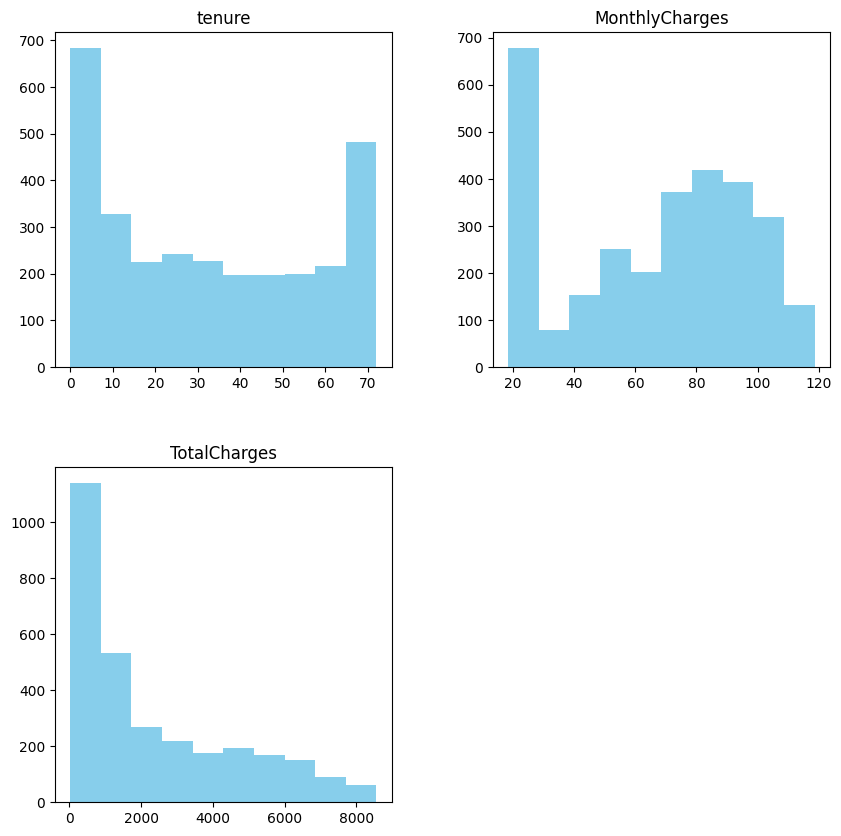

In [18]:
df_3000.hist(figsize=(10,10), grid=False, color='skyblue')
plt.show()

`Comment`: Explaining the plotted histogram

***a.Tenure: ...
   b. Monthtly charges:
   c. Total charges:
***

In [19]:
# Checking for missing values
df_3000.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

df_2000.hist(figsize=(10,10), grid=False, color='sky blue')

In [20]:
# drop the missing value in the churn attribute
df_3000 = df_3000.dropna(subset='Churn')

In [21]:
df_3000.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

***Concating dataset 3000 & 2000***
`Comment`: The datasets are have similar columns so the choice to concating them.

In [22]:
# #Load and concate th two tables.
# df = pd.concat([df_3000, df_2000], axis=0)
# df

In [23]:
def create_summary(df):
    return pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Non-Null Count': df.count()
    }).set_index('Column Name')

# Create summary DataFrames
summary_df1 = create_summary(df_2000)
summary_df3 = create_summary(df_3000)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_df1, summary_df3], axis=1, keys=['df_3000', 'df_2000'])

# Print the side-by-side comparison
print(comparison)


                   df_3000                  df_2000               
                 Data Type Non-Null Count Data Type Non-Null Count
Column Name                                                       
customerID          object           2043    object           2999
gender              object           2043    object           2999
SeniorCitizen        int64           2043      bool           2999
Partner             object           2043      bool           2999
Dependents          object           2043      bool           2999
tenure               int64           2043     int64           2999
PhoneService        object           2043      bool           2999
MultipleLines       object           2043    object           2730
InternetService     object           2043    object           2999
OnlineSecurity      object           2043    object           2348
OnlineBackup        object           2043    object           2348
DeviceProtection    object           2043    object           

In [25]:
# Coverting boolen data types into 'No','Yes' for df_3000 dataset
df_3000['SeniorCitizen']=df_3000['SeniorCitizen'].replace([0,1],['No','Yes'])
df_3000['SeniorCitizen'].value_counts()

df_3000['Dependents']=df_3000['Dependents'].replace([False,True],['No','Yes'])
df_3000['Dependents'].value_counts()

df_3000['PhoneService']=df_3000['PhoneService'].replace([False,True],['No','Yes'])
df_3000['PhoneService'].value_counts()

df_3000['MultipleLines']=df_3000['MultipleLines'].replace([False,True],['No','Yes'])
df_3000['MultipleLines'].value_counts()

df_3000['OnlineSecurity']=df_3000['OnlineSecurity'].replace([False,True],['No','Yes'])
df_3000['OnlineSecurity'].value_counts()

df_3000['OnlineBackup']=df_3000['OnlineBackup'].replace([False,True],['No','Yes'])
df_3000['OnlineBackup'].value_counts()

df_3000['DeviceProtection']=df_3000['DeviceProtection'].replace([False,True],['No','Yes'])
df_3000['DeviceProtection'].value_counts()

df_3000['TechSupport']=df_3000['TechSupport'].replace([False,True],['No','Yes'])
df_3000['TechSupport'].value_counts()

df_3000['StreamingTV']=df_3000['StreamingTV'].replace([False,True],['No','Yes'])
df_3000['StreamingTV'].value_counts()

df_3000['StreamingMovies']=df_3000['StreamingMovies'].replace([False,True],['No','Yes'])
df_3000['StreamingMovies'].value_counts()

df_3000['PaperlessBilling']=df_3000['PaperlessBilling'].replace([False,True],['No','Yes'])
df_3000['PaperlessBilling'].value_counts()

df_3000['Churn']=df_3000['Churn'].replace([False,True],['No','Yes'])
df_3000['Churn'].value_counts()


Churn
No     2219
Yes     780
Name: count, dtype: int64

In [26]:
df_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,False,False,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,False,False,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,False,False,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,False,False,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [27]:
# Coverting boolen data types into 'No','Yes' for df_3000 dataset
df_2000['SeniorCitizen']=df_2000['SeniorCitizen'].replace([0,1],['No','Yes'])
df_2000['SeniorCitizen'].value_counts()

SeniorCitizen
No     1699
Yes     344
Name: count, dtype: int64

In [28]:
df_2000.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
2042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [29]:
def create_summary(df):
    return pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Non-Null Count': df.count()
    }).set_index('Column Name')

# Create summary DataFrames
summary_df2000 = create_summary(df_2000)
summary_df3000 = create_summary(df_3000)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_df2000, summary_df3000], axis=1, keys=['df_3000', 'df_2000'])

# Print the side-by-side comparison
print(comparison)

                   df_3000                  df_2000               
                 Data Type Non-Null Count Data Type Non-Null Count
Column Name                                                       
customerID          object           2043    object           2999
gender              object           2043    object           2999
SeniorCitizen       object           2043      bool           2999
Partner             object           2043      bool           2999
Dependents          object           2043    object           2999
tenure               int64           2043     int64           2999
PhoneService        object           2043    object           2999
MultipleLines       object           2043    object           2730
InternetService     object           2043    object           2999
OnlineSecurity      object           2043    object           2348
OnlineBackup        object           2043    object           2348
DeviceProtection    object           2043    object           

In [30]:
df_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,False,False,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,False,False,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,False,False,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,False,False,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [31]:

#Coparing both datasets
def create_summary(df):
    return pd.DataFrame({
        'Column Name': df.columns,
        'Data Type': df.dtypes,
        'Non-Null Count': df.count()
    }).set_index('Column Name')

# Create summary DataFrames
summary_df2000 = create_summary(df_2000)
summary_df3000 = create_summary(df_3000)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_df2000, summary_df3000], axis=1, keys=['df_3000', 'df_2000'])

# Print the side-by-side comparison
print(comparison)

                   df_3000                  df_2000               
                 Data Type Non-Null Count Data Type Non-Null Count
Column Name                                                       
customerID          object           2043    object           2999
gender              object           2043    object           2999
SeniorCitizen       object           2043      bool           2999
Partner             object           2043      bool           2999
Dependents          object           2043    object           2999
tenure               int64           2043     int64           2999
PhoneService        object           2043    object           2999
MultipleLines       object           2043    object           2730
InternetService     object           2043    object           2999
OnlineSecurity      object           2043    object           2348
OnlineBackup        object           2043    object           2348
DeviceProtection    object           2043    object           

In [32]:
df_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,False,False,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,False,False,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,False,False,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,False,False,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


***Concating both datasets***

In [35]:
# Concatenating the two datasets with variable name df_concat_data
df_concat_data = pd.concat([df_3000, df_2000], axis=1)
print("\nConcatenated dataframes:")
print(df_concat_data )


Concatenated dataframes:
              customerID  gender SeniorCitizen Partner Dependents  tenure  \
0             7590-VHVEG  Female         False    True         No       1   
1             5575-GNVDE    Male         False   False         No      34   
2             3668-QPYBK    Male         False   False         No       2   
3             7795-CFOCW    Male         False   False         No      45   
4             9237-HQITU  Female         False   False         No       2   
...                  ...     ...           ...     ...        ...     ...   
2995          2209-XADXF  Female         False   False         No       1   
2996          6620-JDYNW  Female         False   False         No      18   
2997          1891-FZYSA    Male          True    True         No      69   
2998          4770-UEZOX    Male         False   False         No       2   
2999  1A1:U3001038-RQOST    Male         False    True        Yes      19   

     PhoneService MultipleLines InternetService O

***Checking and handling duplicates***

In [38]:
# There are no duplicates
print("Number of duplicated data in concatenated tables:", df_concat_data.duplicated().sum())

Number of duplicated data in concatenated tables: 0


# Univariate Analysis

[Back to Top](#Table-of-Contents)

## Step 3: Data Preparation & Feature Engineering

`Data Splitting`

Use train_test_split with a random_state, and add stratify for Classification

`Impute Missing Values`

Use sklearn.impute.SimpleImputer

`Features Creation`


`Features Encoding`
From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

`Feature Scaling`

Use sklearn.preprocessing.StandardScaler to scale the numerical features.

`Train set Balancing`

Use sklearn.utils.resample to balance the dataset and or use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

[Back to Top](#Table-of-Contents)

## Step 4: Modeleling and Evaluation
Build, train, and test the four(4)models and models.

`Craete the Model`

`Train the Model`
use the following method to train the model: .fit() method

`Evaluate the Model on the Evaluation dataset`
Compute the valid metrics for the model

`Predict on the unknown dataset`
Use .predict method .predict_proba()

`Save the Model`

`repeat the above method by creating three(3)models`

`Model Comparison`

`Hyperparameter Analysis`


[Back to Top](#Table-of-Contents)

## Step 6: Document the entire process in an article on medium